# Customer Segmentation

## Problem Statement
Since the dataset provides labels, it's better to approach this problem as a multi-class classification.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')
plt.rcParams['axes.spines.top'] = False    # Remove top border
plt.rcParams['axes.spines.right'] = False  # Remove right border

# Load Data

In [3]:
data = pd.read_csv('../Data/Raw/customer_segmentation_data.csv')
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 53503 rows and 20 columns


In [13]:
df = data.copy()

# Data Overview

In [4]:
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [5]:
df.tail()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5
53502,62125,20,Male,Divorced,Doctorate,Daman and Diu,Salesperson,136632,policy2,10/14/2022,Phone,policy1,743262,4499,Group,Text,In-Person Meeting,Evening,German,Segment2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

## Checking for Missing Values

In [7]:
df.isna().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

## Checking for Duplicates

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('Customer ID', axis=1).duplicated().sum()

0

## Summary Statistics

In [10]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,53503.0,NaN,NaN,NaN,52265.204998,28165.000067,1.0,28950.5,55858.0,76096.0,100000.0
Age,53503.0,NaN,NaN,NaN,44.140945,15.079486,18.0,32.0,43.0,57.0,70.0
Gender,53503,2,Male,27499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,53503,5,Married,13219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,53503,5,Associate Degree,12213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Geographic Information,53503,35,Lakshadweep,2140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,53503,9,Salesperson,7919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income Level,53503.0,NaN,NaN,NaN,82768.324318,36651.07567,20001.0,51568.5,80719.0,115973.5,149999.0
Behavioral Data,53503,5,policy3,15761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase History,53503,2016,03-12-2018,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA) and Visualization

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

## Univariate Analysis

In [14]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)
        
print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 15 ['Gender', 'Marital Status', 'Education Level', 'Geographic Information', 'Occupation', 'Behavioral Data', 'Purchase History', 'Interactions with Customer Service', 'Insurance Products Owned', 'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language', 'Segmentation Group']
Numeric columns: 5 ['Customer ID', 'Age', 'Income Level', 'Coverage Amount', 'Premium Amount']


### Categorical Features

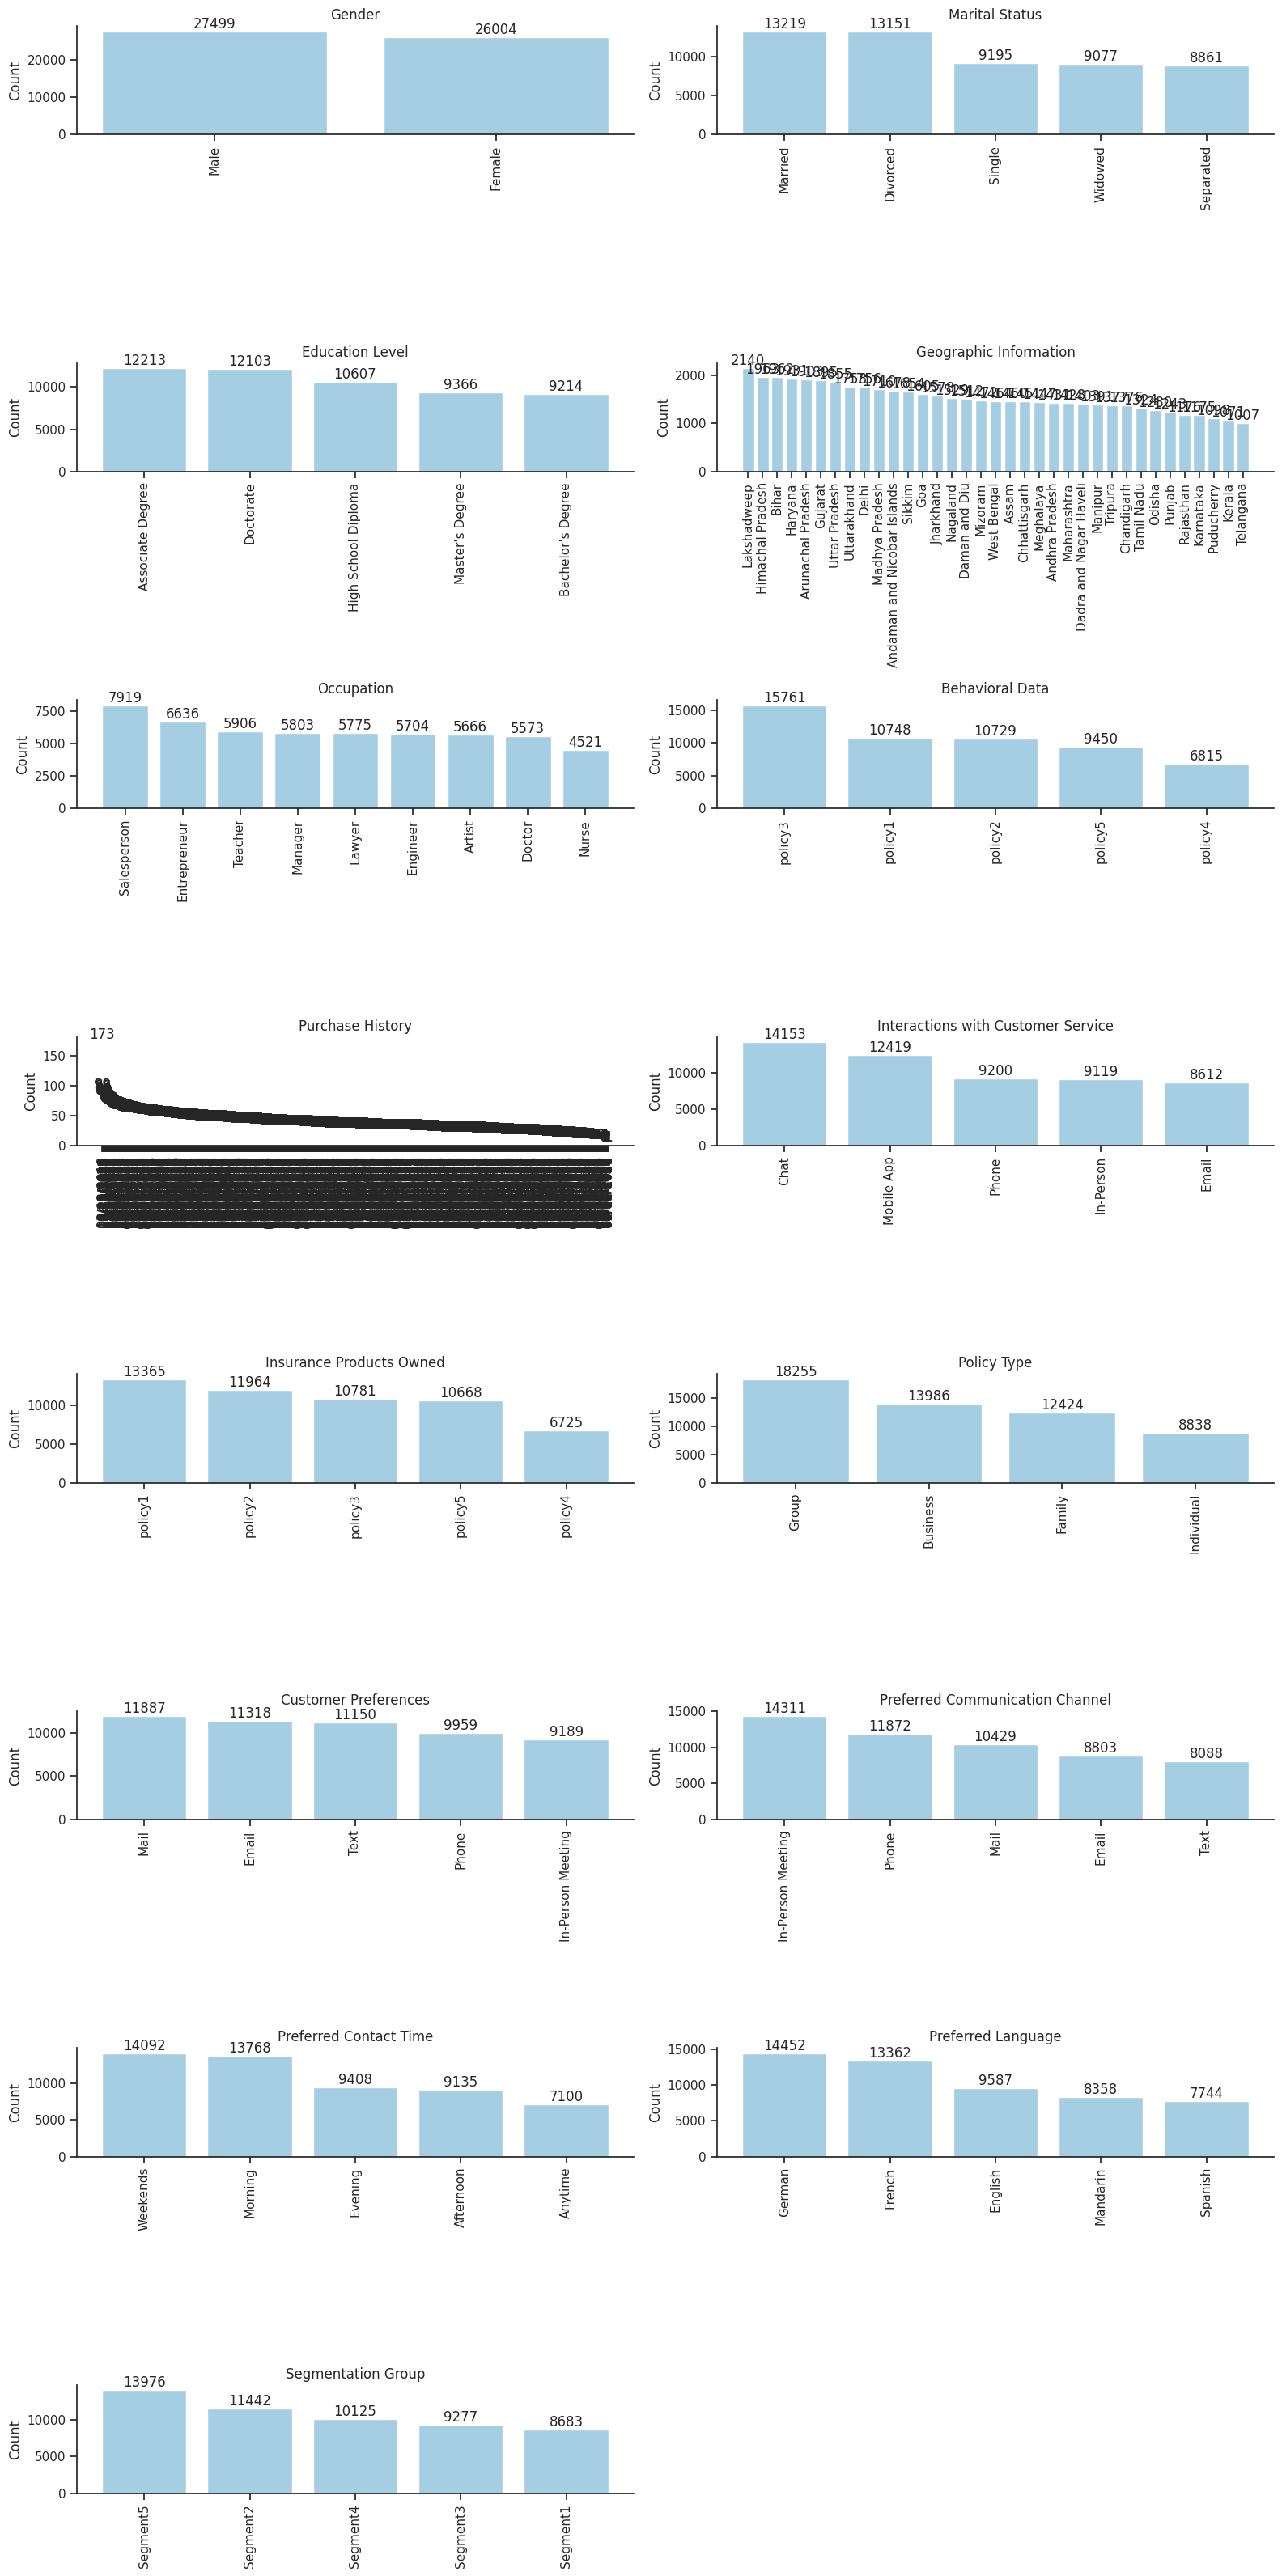

In [12]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(cat_cols)/n_cols)) 
    
# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
axes = axes.flatten()
    
for i, feature in enumerate(cat_cols):
    bar_container = axes[i].bar(df[feature].value_counts().index, df[feature].value_counts().values)
    axes[i].set(ylabel='Count', title=feature)
    axes[i].bar_label(bar_container)
    axes[i].tick_params(axis='x', rotation=90)
        
# If the number of features is odd, remove the empty subplot
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1])
    
plt.tight_layout()
plt.show(block=False)

### Numeric Features

We'll ignore the unique identifier column which is Customer ID.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

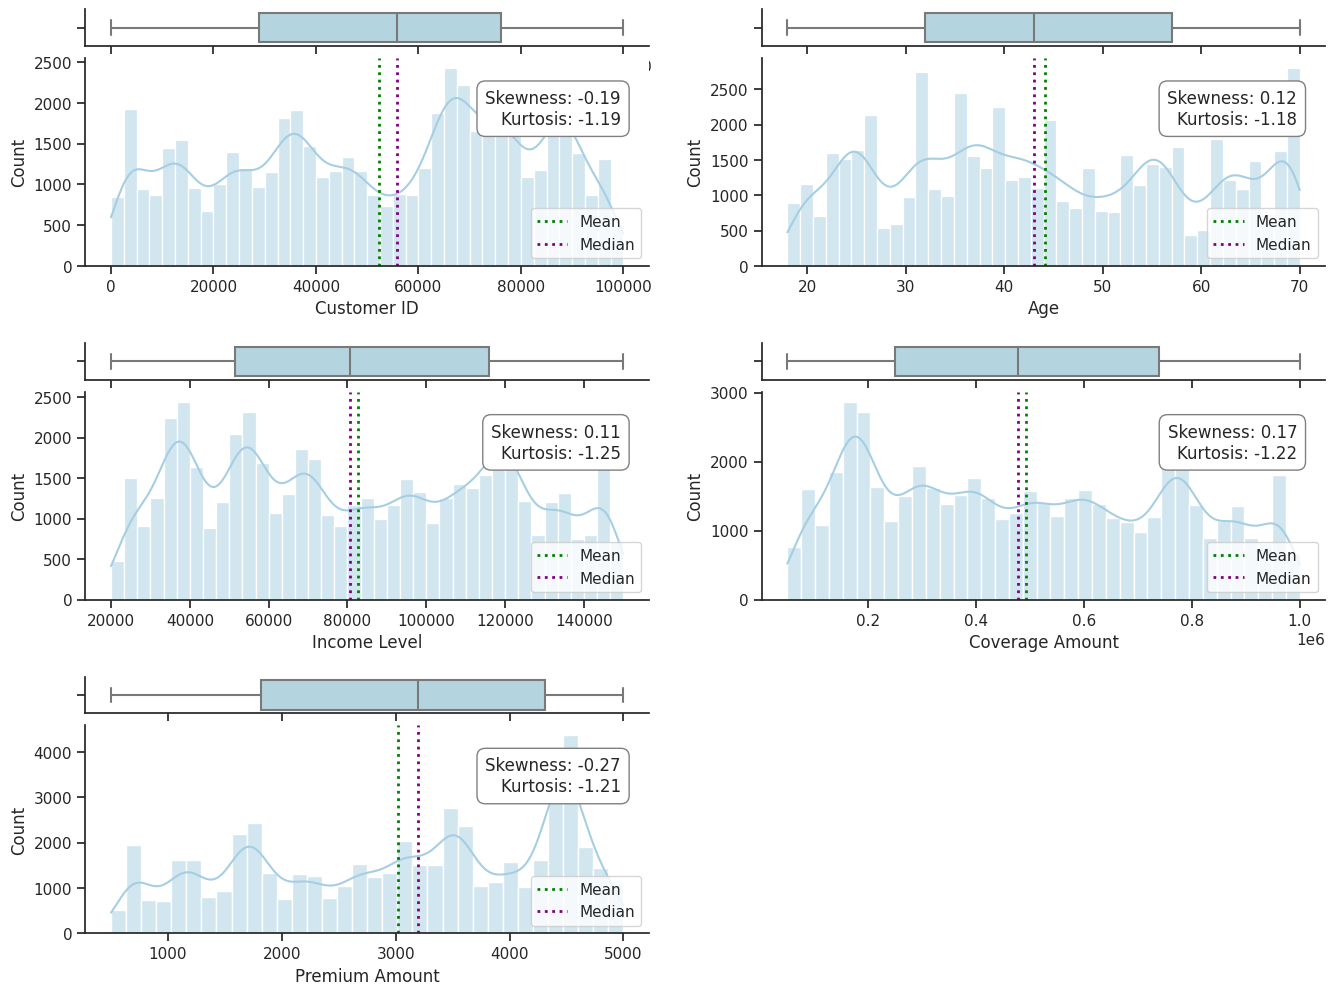

In [42]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(num_cols)/n_cols)) 

# Create figure
fig = plt.figure(figsize=(16, 4*n_rows))
outer = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.3)

for i in range(len(num_cols)):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], 
                                             wspace=0.1, hspace=0.1, height_ratios=(0.15, 0.85))

    ax_box = plt.Subplot(fig, inner[0])
    sb.boxplot(data=df, x=num_cols[i], color='lightblue', ax=ax_box)
    ax_box.set_xlabel('')
    fig.add_subplot(ax_box)
        
    mean_value = df[num_cols[i]].mean()
    median_value = df[num_cols[i]].median()
    ax_hist = plt.Subplot(fig, inner[1])
    sb.histplot(data=df, x=num_cols[i], kde=True, ax=ax_hist)
    ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
    ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
    # Add a legend
    ax_hist.legend(loc='lower right')
        
    # Calculate skewness and kurtosis
    skewness = df[num_cols[i]].skew()
    kurt = df[num_cols[i]].kurt()
    # Add skewness and kurtosis as text on the histogram plot
    ax_hist.text(0.95, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
                     transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                     bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
    fig.add_subplot(ax_hist)

plt.tight_layout()
plt.show()

## Bivariate Analysis

In [15]:
# Create a copy of the list of the categorical columns except the label which is 'Segmentation Group'
cat_features = cat_cols.copy()
cat_features.remove('Segmentation Group')
# Removing 'Purchase History' which we'll tread it in a different way in the next sections
cat_features.remove('Purchase History')

cat_features

['Gender',
 'Marital Status',
 'Education Level',
 'Geographic Information',
 'Occupation',
 'Behavioral Data',
 'Interactions with Customer Service',
 'Insurance Products Owned',
 'Policy Type',
 'Customer Preferences',
 'Preferred Communication Channel',
 'Preferred Contact Time',
 'Preferred Language']

In [ ]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(cat_features)/n_cols)) 
    
# Create figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()
    
for i, feature in enumerate(cat_features):
    # Set the style of the ticks on x axis
    plt.xticks(rotation=90, fontsize=12)

    # Plot the counts for each category
    sb.countplot(
        data=df,
        x = feature,
        palette = 'Paired',
        order = df[feature].value_counts().index[:].sort_values(),
        hue = 'Segmentation Group',
        ax=ax[i]
    )
    ax[i].tick_params(axis='x', rotation=90)
        
# If the number of features is odd, remove the empty subplot
if len(cat_features) % 2 != 0:
    fig.delaxes(ax[-1])
    
plt.tight_layout()
plt.show(block=False)

In [16]:
# Remove Customer ID 
num_features = num_cols[1:]

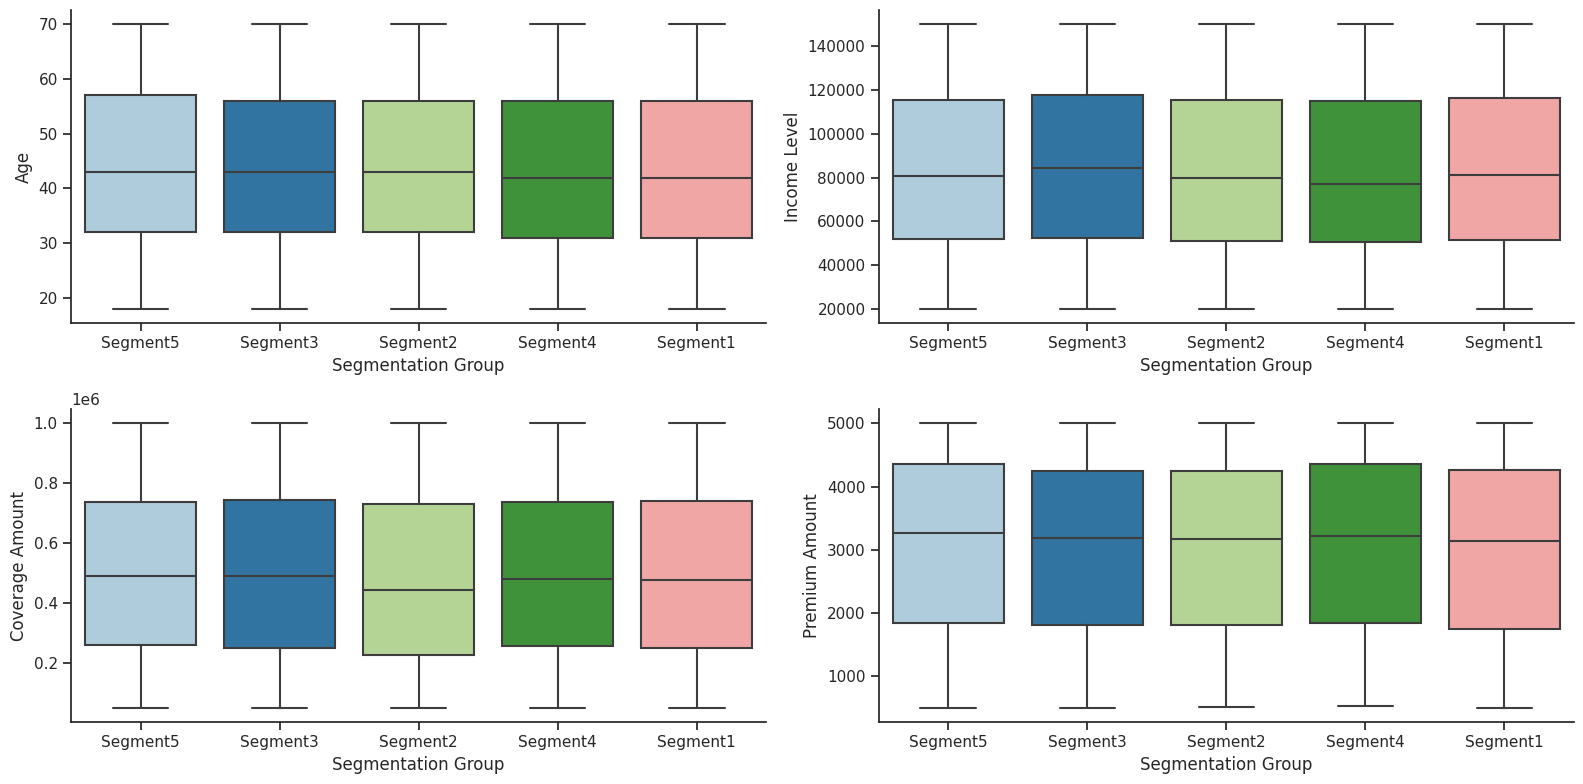

In [17]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(num_features)/n_cols)) 

# Create figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()
    
for i, feature in enumerate(num_features):
    sb.boxplot(data=df, x='Segmentation Group', y=feature, ax=ax[i])

# If the number of features is odd, remove the empty subplot
if len(num_features) % 2 != 0:
    fig.delaxes(ax[-1])
    
plt.tight_layout()
plt.show(block=False)

## Mutlivariate Analysis

In [ ]:
sb.pairplot(data=df.drop(['Customer ID', 'Purchase History'], axis=1), hue='Segmentation Group')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

# Data Preperation

- Remove Customer ID column
- Process the Purchase History

In [5]:
df['Purchase History'].head()

0    04-10-2018
1    11-06-2018
2    06-05-2021
3    09-02-2018
4    09-10-2018
Name: Purchase History, dtype: object

In [6]:
df['Purchase History'].tail()

53498    01-01-2019
53499     5/18/2021
53500    11/27/2018
53501    06-04-2021
53502    10/14/2022
Name: Purchase History, dtype: object

In [7]:
df['Purchase History'].sample(10)

44014     2/27/2018
17246     2/26/2018
52821    12-02-2018
2987     11-01-2022
1247     01-07-2020
17523    08-01-2019
47802     9/27/2018
9666     04-09-2020
40658    11-09-2022
32633    12/24/2022
Name: Purchase History, dtype: object

🔎 **Observations:** This looks like a purchase dataset rather than a customer dataset. Let's check if there are any repeting purchases for the same customer.

In [8]:
df['Customer ID'].value_counts()

Customer ID
1         34
100000    15
77821      6
87793      6
3687       6
          ..
96531      1
96440      1
71129      1
44958      1
63136      1
Name: count, Length: 40259, dtype: int64

In [9]:
df.shape[0]

53503

🔎 **Observations:** As you can see from the above cell there are some customers that have multiple purchases

In [10]:
df[df['Customer ID'] == 1]

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
176,1,26,Female,Married,High School Diploma,Telangana,Artist,37298,policy3,6/17/2018,Phone,policy5,480381,4460,Family,Text,Phone,Anytime,Mandarin,Segment1
291,1,19,Female,Single,High School Diploma,Haryana,Salesperson,106557,policy3,10/24/2020,Phone,policy2,647850,4631,Individual,Text,Email,Afternoon,French,Segment3
1656,1,34,Female,Separated,Master's Degree,Himachal Pradesh,Artist,55148,policy1,01-10-2022,In-Person,policy5,347549,4383,Group,Email,Mail,Morning,German,Segment2
1737,1,28,Male,Married,High School Diploma,Puducherry,Engineer,147691,policy1,01-09-2023,Mobile App,policy5,180123,4558,Group,Mail,Mail,Evening,Spanish,Segment4
2132,1,46,Female,Married,Associate Degree,Mizoram,Engineer,54624,policy1,9/25/2023,In-Person,policy1,578115,4401,Individual,Mail,In-Person Meeting,Weekends,French,Segment2
2167,1,53,Female,Divorced,Associate Degree,Lakshadweep,Entrepreneur,59384,policy3,5/16/2022,Email,policy3,793455,3948,Business,Mail,Mail,Evening,English,Segment1
2228,1,39,Female,Married,Master's Degree,Odisha,Doctor,104415,policy1,3/22/2018,Chat,policy2,125695,1236,Business,Email,Text,Evening,German,Segment3
3088,1,52,Male,Divorced,High School Diploma,Andaman and Nicobar Islands,Salesperson,54148,policy1,1/24/2018,In-Person,policy2,272803,2692,Business,In-Person Meeting,In-Person Meeting,Afternoon,Spanish,Segment2
6559,1,41,Female,Widowed,Associate Degree,Madhya Pradesh,Manager,52277,policy1,2/15/2019,Phone,policy5,948055,1123,Family,In-Person Meeting,In-Person Meeting,Weekends,French,Segment2
15037,1,19,Female,Single,Associate Degree,West Bengal,Entrepreneur,122336,policy3,11/16/2020,Mobile App,policy2,453769,1618,Group,Text,In-Person Meeting,Anytime,Spanish,Segment3


🔎 **Observations:** However, the same Customer ID has different demographic information for different enteries. So, it's not something like a customer unique identifier. We'll continue assuming that each enteri is a different Customer. 


In [24]:
df['Purchase History'].dtype

dtype('O')

In [17]:
df.drop(['Customer ID', 'Purchase History'], axis=1, inplace=True)

# Model Building

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [55]:
def model_evaluation(x, y, models):
    '''
        This function takes x, y and models and applies 
        k-fold cross validation to the each algorithm in 
        the models list by using x and y training set. 
        Displays the mean and standard deviation of 
        accuracy, precision, recall, f1 scores in tabular
        format and boxplots.

        ---
        ### Parameters
        - x <array>: Feature values.
        - y <array>: Target values.
        - models <list>: List of the model objects to be vealuated.
    '''
    
    names = []
    scoring = ['accuracy']
    
    # Create a dataframe to store the different metric values for each algorithm
    df_results = pd.DataFrame(columns=['Algorithm', 'Acc Mean', 'Acc STD'])
    results_acc = [] # List of accuracy scores for each fold of each algorithm
    
    for name, model in models:
        names.append(name)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
        result = cross_validate(model, x, y, cv=kfold, scoring=scoring)
    
        # Mean and standard deviation of Accuracy scores for the algorithm
        acc_mean = result['test_accuracy'].mean()
        acc_std = result['test_accuracy'].std()
        
        # Create the row of the results
        df_result_row = {'Algorithm': name, 'Acc Mean': acc_mean, 'Acc STD': acc_std}
        # Add the row to the results data frame
        df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)
        
        results_acc.append(result['test_accuracy'])
        
    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # Display the mean and standard deviation of all metrics for all algorithms
    print(df_results)
    
    # Display the overall results in a boxplot graph
    width = (len(models)*2)
    plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(width, 6))
    fig, ax = plot_objects
    
    ax.boxplot(results_acc)
    ax.set_title('Accuracy', fontsize=14)
    ax.set_xticklabels(names, rotation=30)
    plt.tight_layout()
    plt.show()

## Data Preprocessing

- Encoding the categorical columns
- Spliting the data
- Scaling the numerical columns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
lbl_encoder = LabelEncoder()
df['Segmentation Group Encoded'] = lbl_encoder.fit_transform(df['Segmentation Group'])
df['Segmentation Group Encoded'].value_counts()

Segmentation Group Encoded
4    13976
1    11442
3    10125
2     9277
0     8683
Name: count, dtype: int64

In [20]:
x = df.drop(['Segmentation Group', 'Segmentation Group Encoded'], axis=1)
y = df['Segmentation Group Encoded']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [21]:
# Define transformers for different column types
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine transformers for specific columns
preprocessor = ColumnTransformer([
    ("num", numerical_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

# Fit transformers on training data only
preprocessor.fit(x_train)

# Transform train and test data using fitted transformers
x_train_transformed = preprocessor.transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

x_train_transformed.shape

(42802, 86)

## Evaluating Different Algorithms

In this section we'll evaluate non-linear and ensemble algorithms using k-fold cross validation.

### Ensemble Mehtods

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
ens_models = []
ens_models.append(('RFC', RandomForestClassifier()))
ens_models.append(('ABC', AdaBoostClassifier()))
ens_models.append(('GBC', GradientBoostingClassifier()))

/tmp/ipykernel_33/3368041387.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)


           Acc Mean  Acc STD
Algorithm                   
RFC           0.257    0.003
ABC           0.274    0.005
GBC           0.277    0.005


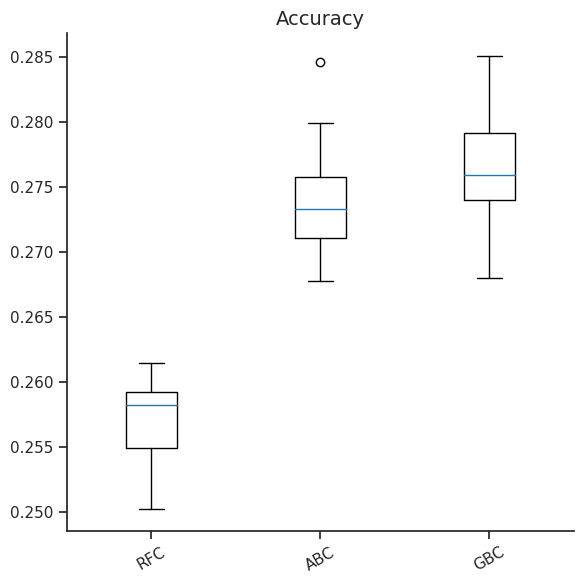

In [34]:
model_evaluation(x_train_transformed, y_train, ens_models)

### Non-linear Mehtods

In [35]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [36]:
nl_models = []
nl_models.append(('SVC', SVC()))
nl_models.append(('DTC', DecisionTreeClassifier()))
nl_models.append(('KNN', KNeighborsClassifier()))
nl_models.append(('GNB', GaussianNB()))
nl_models.append(('XGB', XGBClassifier()))

/tmp/ipykernel_33/3368041387.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)


           Acc Mean  Acc STD
Algorithm                   
SVC           0.268    0.003
DTC           0.214    0.008
KNN           0.212    0.005
GNB           0.228    0.007
XGB           0.260    0.008


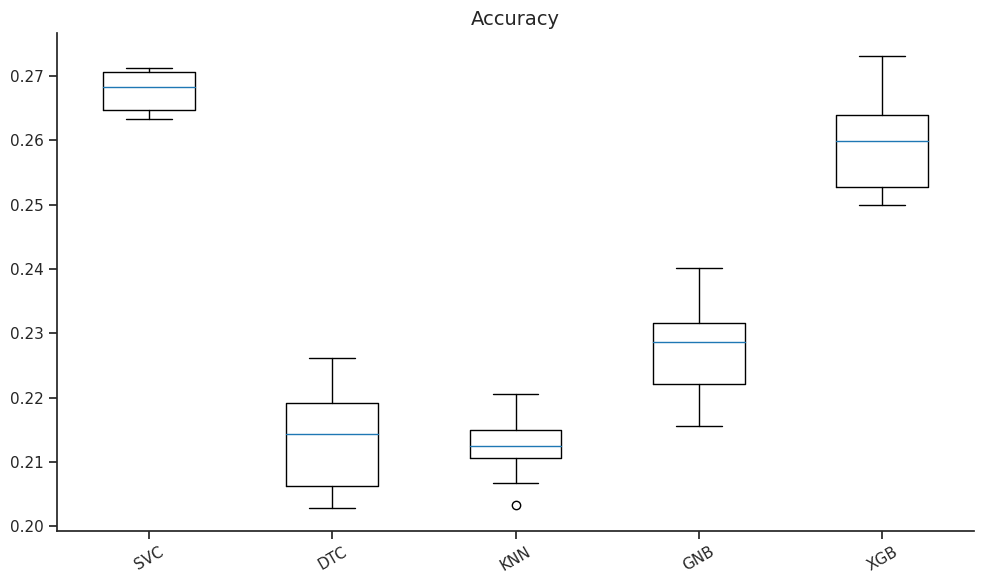

In [37]:
model_evaluation(x_train_transformed, y_train, nl_models)

🔎 **Observations:** It's obvious that with the current data we have, we can't get a high performing estimator. Also the validation procedure takes a lot of time due to high number of features. We can utilize some demansionality reduction technique to reduce the validation time.


In [22]:
# Importing PCA and t-SNE
from sklearn.decomposition import PCA

In [24]:
# Defining the number of principal components to generate
n = x_train_transformed.shape[1]

# Finding principal components for the data
pca = PCA(n_components=n, random_state=101)

data_pca1 = pd.DataFrame(pca.fit_transform(x_train_transformed))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

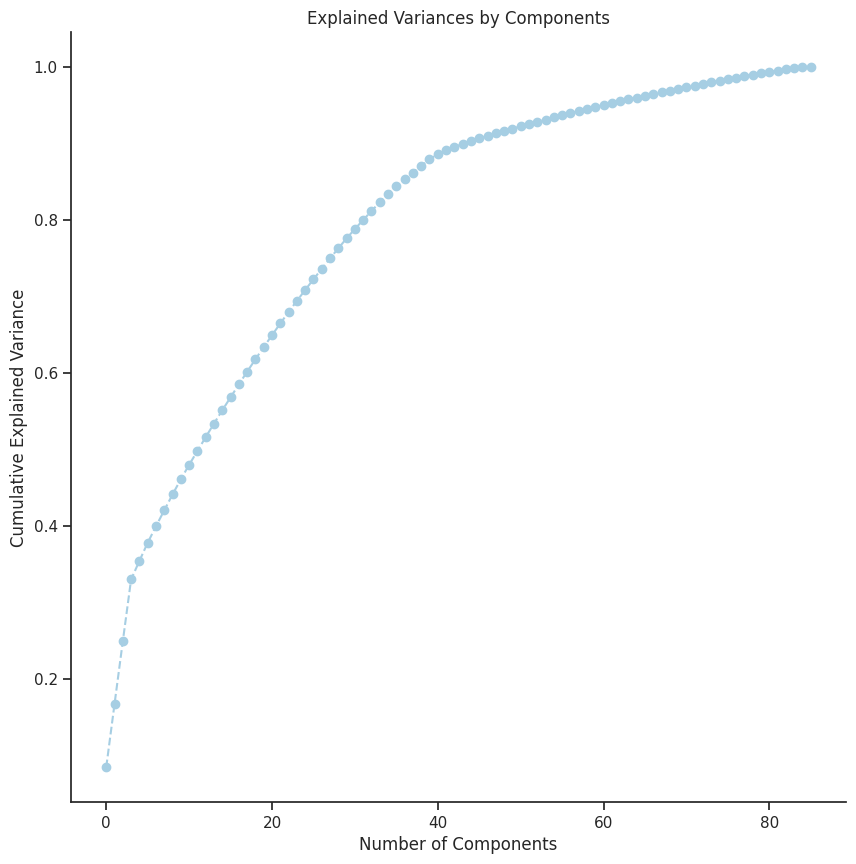

In [27]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [49]:
data_pca1.shape

(42802, 86)

In [28]:
# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance:", ix+1)
        break

Number of PCs that explain at least 70% variance: 25


In [34]:
labels = ['PC' + str(x) for x in range(1, (ix+2))]
labels

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25']

In [51]:
data_pca1.iloc[:, :24].shape

(42802, 24)

/tmp/ipykernel_33/3368041387.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)


           Acc Mean  Acc STD
Algorithm                   
RFC           0.247    0.007
ABC           0.263    0.006
GBC           0.262    0.003


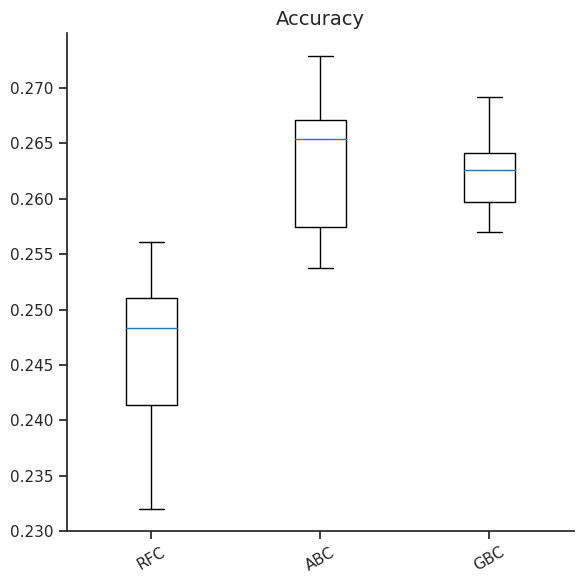

In [57]:
model_evaluation(data_pca1.iloc[:, :24].values, y_train, ens_models)

# Conclusion & Future Work

It looks like PCA couldn't provide the expected results. So we might need to tackle more with the data later on to improve the performance of the model.